# Capstone project: Identify potential customer using supervised machine learning

## Objective

#### We aim to design a predictive model to determine the potential customers for a new product launched by company A. The target variable is `Potential_Customer`. 

We have been provided with information such as customers spending for last several years, the amount of money spent, Number of inactive months and so on.

## Data Description
- Below is the description of each feature available in the dataset
<img src="images/MicrosoftTeams-image.png" style="height: 700px">

# 1. Import necessary Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

/Users/nabilaothman/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 2. Load the Data into Pandas Dataframe

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,$5.00,2,17,2,4,$0.00,$7.50,$7.76,...,73,3,12,16,A,0,71.0,F,H,"$65,957.00"
1,1,87939,$30.00,1,7,0,3,$25.00,$25.00,$13.00,...,55,6,6,22,A,1,7.0,M,U,$0.00
2,0,88003,NaN,5,12,3,5,$15.00,$15.00,$11.25,...,53,6,17,22,S,1,79.0,F,U,$0.00
3,1,188721,$20.00,1,11,0,3,$20.00,$20.00,$12.45,...,71,8,8,33,A,0,73.0,F,U,"$76,293.00"
4,1,88056,$5.00,3,15,2,7,$3.00,$4.33,$3.80,...,63,6,12,24,S,1,68.0,F,H,"$113,663.00"


In [3]:
#number of null / missing values in each column
df.isnull().sum()

Potential_Customer             0
C_ID                           0
Cust_Last_Purchase          2320
Pur_3_years                    0
Pur_5_years                    0
Pur_3_years_Indirect           0
Pur_5_years_Indirect           0
Pur_latest                     0
Pur_3_years_Avg                0
Pur_5_years_Avg                0
Pur_3_years_Avg_Indirect     827
InAct_Last                     0
InAct_First                    0
Ad_Res_1_year                  0
Ad_Res_3_Year                  0
Ad_Res_5_Year                  0
Ad_Res_Ind_1_Year              0
Ad_Res_Ind_3_Year              0
Ad_Res_Ind_5_Year              0
Status_Cust                    0
Status_Latest_Ad               0
Age                          959
Gender                         0
Cust_Prop                      0
Cust_Ann_Income                0
dtype: int64

# 3. Data Integrity Check

Data Cleaning (Checking the existance of missing values, the type of variables, or integrity of data) should be done on the whole data. But EDA (checking the relationship of variables, summary of data, outliers, filling missing values etc.) should be done only on train set because we assume our analysis never sees the test set. However, if for instance we decide to fill missing values in one variable with specific number as the result of EDA on train set, then all missing values in both train and test will be filled with than value.

**Attention:**
> Be careful about information leakage from test set!

## 3.1. How big is the data? (number of rows, features and their types)

In [4]:
#number of rows and features in the data and each of the features types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        4469 non-null   int64  
 1   C_ID                      4469 non-null   int64  
 2   Cust_Last_Purchase        2149 non-null   object 
 3   Pur_3_years               4469 non-null   int64  
 4   Pur_5_years               4469 non-null   int64  
 5   Pur_3_years_Indirect      4469 non-null   int64  
 6   Pur_5_years_Indirect      4469 non-null   int64  
 7   Pur_latest                4469 non-null   object 
 8   Pur_3_years_Avg           4469 non-null   object 
 9   Pur_5_years_Avg           4469 non-null   object 
 10  Pur_3_years_Avg_Indirect  3642 non-null   object 
 11  InAct_Last                4469 non-null   int64  
 12  InAct_First               4469 non-null   int64  
 13  Ad_Res_1_year             4469 non-null   int64  
 14  Ad_Res_3

In [5]:
#shape of the data (number of rows, number of columns)
df.shape

(4469, 25)

In [6]:
print(df.groupby('Potential_Customer').size())

Potential_Customer
0    2320
1    2149
dtype: int64


In [7]:
#percentage of null/missing values in each column
#we can use this info to delete columns with high percentage of null values
NAN = [(col, df[col].isna().mean()*100) for col in df]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
NAN

,column_name,percentage
0,Potential_Customer,0.000000
1,C_ID,0.000000
2,Cust_Last_Purchase,51.913180
3,Pur_3_years,0.000000
4,Pur_5_years,0.000000
5,Pur_3_years_Indirect,0.000000
6,Pur_5_years_Indirect,0.000000
7,Pur_latest,0.000000
8,Pur_3_years_Avg,0.000000
9,Pur_5_years_Avg,0.000000


<AxesSubplot:>

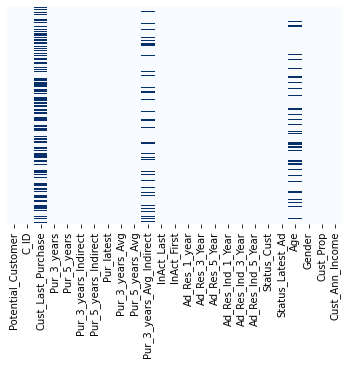

In [8]:
#view the null values in the form of heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

### 3.1.1 Why columns such as `Cust_Last_Purchase` are `object` while they should be `float64`?
#### 3.1.1.1 Remove the dollar sign and comma from data

**Hint:** You can use `df.col=df.col.str.replace('OldSign', 'NewSign')` 

**Example:** `data.Cust_Last_Purchase=data.Cust_Last_Purchase.str.replace('$', '')`

In [9]:
df.Cust_Ann_Income=df.Cust_Ann_Income.str.replace(',', '')
df.Pur_latest=df.Pur_latest.str.replace('$', '')
df.Pur_3_years_Avg=df.Pur_3_years_Avg.str.replace('$', '')
df.Pur_5_years_Avg=df.Pur_5_years_Avg.str.replace('$', '')
df.head()

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,$5.00,2,17,2,4,0.00,7.50,7.76,...,73,3,12,16,A,0,71.0,F,H,$65957.00
1,1,87939,$30.00,1,7,0,3,25.00,25.00,13.00,...,55,6,6,22,A,1,7.0,M,U,$0.00
2,0,88003,NaN,5,12,3,5,15.00,15.00,11.25,...,53,6,17,22,S,1,79.0,F,U,$0.00
3,1,188721,$20.00,1,11,0,3,20.00,20.00,12.45,...,71,8,8,33,A,0,73.0,F,U,$76293.00
4,1,88056,$5.00,3,15,2,7,3.00,4.33,3.80,...,63,6,12,24,S,1,68.0,F,H,$113663.00


In [10]:
df['Pur_3_years_Avg_Indirect'] = df['Pur_3_years_Avg_Indirect'].str.replace('$', '').astype(float)

In [11]:
df.Cust_Last_Purchase=df.Cust_Last_Purchase.str.replace('$', '')
df.Cust_Ann_Income=df.Cust_Ann_Income.str.replace('$', '')

In [12]:
#check if all the $ and ',' has been removed from the dataset
df.head()

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,5.00,2,17,2,4,0.00,7.50,7.76,...,73,3,12,16,A,0,71.0,F,H,65957.00
1,1,87939,30.00,1,7,0,3,25.00,25.00,13.00,...,55,6,6,22,A,1,7.0,M,U,0.00
2,0,88003,NaN,5,12,3,5,15.00,15.00,11.25,...,53,6,17,22,S,1,79.0,F,U,0.00
3,1,188721,20.00,1,11,0,3,20.00,20.00,12.45,...,71,8,8,33,A,0,73.0,F,U,76293.00
4,1,88056,5.00,3,15,2,7,3.00,4.33,3.80,...,63,6,12,24,S,1,68.0,F,H,113663.00


## 3.2. Check data for duplicate rows

In [13]:
def check_duplicate(d,c):
    if len(d[c])>len(set(d[c])):
        print('Data has duplicate')
    else:
        print('Data does not have duplicate')

check_duplicate(df, 'C_ID')

Data has duplicate


### 3.2.1 Remove duplicate rows
**Hint:** Use `df=df.drop_duplicates()`

In [14]:
df=df.drop_duplicates()

## 3.3. Do we need `C_ID` in our analysis?


We do not need the C_ID column because it only contains the unique ID of the customers and we should remove it if we want to create machine learning model.

In [15]:
#Drop the C_ID column
df.drop(['C_ID'], axis=1, inplace=True)

In [16]:
#check if the C_ID has been removed
#can also used df.head()
df.columns

Index(['Potential_Customer', 'Cust_Last_Purchase', 'Pur_3_years',
       'Pur_5_years', 'Pur_3_years_Indirect', 'Pur_5_years_Indirect',
       'Pur_latest', 'Pur_3_years_Avg', 'Pur_5_years_Avg',
       'Pur_3_years_Avg_Indirect', 'InAct_Last', 'InAct_First',
       'Ad_Res_1_year', 'Ad_Res_3_Year', 'Ad_Res_5_Year', 'Ad_Res_Ind_1_Year',
       'Ad_Res_Ind_3_Year', 'Ad_Res_Ind_5_Year', 'Status_Cust',
       'Status_Latest_Ad', 'Age', 'Gender', 'Cust_Prop', 'Cust_Ann_Income'],
      dtype='object')

## 3.4. Check if the column types are accurate? if not fix them

In [17]:
df.dtypes

Potential_Customer            int64
Cust_Last_Purchase           object
Pur_3_years                   int64
Pur_5_years                   int64
Pur_3_years_Indirect          int64
Pur_5_years_Indirect          int64
Pur_latest                   object
Pur_3_years_Avg              object
Pur_5_years_Avg              object
Pur_3_years_Avg_Indirect    float64
InAct_Last                    int64
InAct_First                   int64
Ad_Res_1_year                 int64
Ad_Res_3_Year                 int64
Ad_Res_5_Year                 int64
Ad_Res_Ind_1_Year             int64
Ad_Res_Ind_3_Year             int64
Ad_Res_Ind_5_Year             int64
Status_Cust                  object
Status_Latest_Ad              int64
Age                         float64
Gender                       object
Cust_Prop                    object
Cust_Ann_Income              object
dtype: object

There are 6 columns with wrong types.

In [18]:
#Fix the columns type and check
df['Cust_Last_Purchase'] = pd.to_numeric(df['Cust_Last_Purchase'])         
df['Pur_latest'] = pd.to_numeric(df['Pur_latest'])
df['Pur_3_years_Avg'] = pd.to_numeric(df['Pur_3_years_Avg'])
df['Pur_5_years_Avg'] = pd.to_numeric(df['Pur_5_years_Avg'])
df['Pur_3_years_Avg_Indirect'] = pd.to_numeric(df['Pur_3_years_Avg_Indirect'])
df['Cust_Ann_Income'] = pd.to_numeric(df['Cust_Ann_Income'])
df.dtypes

Potential_Customer            int64
Cust_Last_Purchase          float64
Pur_3_years                   int64
Pur_5_years                   int64
Pur_3_years_Indirect          int64
Pur_5_years_Indirect          int64
Pur_latest                  float64
Pur_3_years_Avg             float64
Pur_5_years_Avg             float64
Pur_3_years_Avg_Indirect    float64
InAct_Last                    int64
InAct_First                   int64
Ad_Res_1_year                 int64
Ad_Res_3_Year                 int64
Ad_Res_5_Year                 int64
Ad_Res_Ind_1_Year             int64
Ad_Res_Ind_3_Year             int64
Ad_Res_Ind_5_Year             int64
Status_Cust                  object
Status_Latest_Ad              int64
Age                         float64
Gender                       object
Cust_Prop                    object
Cust_Ann_Income             float64
dtype: object

In [19]:
#separate categorical and numerical data
CatCols=['Potential_Customer','Status_Cust', 'Status_Latest_Ad',
         'Gender', 'Cust_Prop']
NumCols=list(set(df.columns)-set(CatCols))

In [20]:
NumCols

['Pur_3_years_Avg',
 'Ad_Res_1_year',
 'Pur_3_years_Indirect',
 'Age',
 'Ad_Res_Ind_3_Year',
 'Ad_Res_Ind_1_Year',
 'Pur_latest',
 'Ad_Res_5_Year',
 'InAct_First',
 'Ad_Res_Ind_5_Year',
 'Cust_Last_Purchase',
 'Ad_Res_3_Year',
 'Cust_Ann_Income',
 'InAct_Last',
 'Pur_5_years',
 'Pur_3_years',
 'Pur_5_years_Indirect',
 'Pur_5_years_Avg',
 'Pur_3_years_Avg_Indirect']

# 4. Split data to train/test 

Split the data into 75/25 train/test set. Use random_state=42 and stratify=y

In [21]:
#import libraries

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, Normalizer, RobustScaler 

In [22]:
# Create X and y variable and split the data into train and test set.

X = df.drop(['Potential_Customer'], axis=1)
y = df['Potential_Customer']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42, stratify=y)

# 5. Exploratory Data Analysis (EDA)

## 5.1. Explore Categorical Variables

In [23]:
#Statistical summary of the train set 
X_train.describe() 

,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Latest_Ad,Age,Cust_Ann_Income
count,1302.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2193.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2128.000000,2713.000000
mean,14.694508,3.318098,11.039808,1.909325,5.865463,15.336896,14.450792,12.034029,13.656694,17.920015,73.671581,13.100995,29.763362,49.707704,5.436049,12.071139,19.545522,0.563214,58.414944,42138.353852
std,11.671854,2.207730,9.405635,1.644883,4.889709,11.189572,10.500633,8.344377,10.070091,4.221977,38.002360,5.021426,7.805907,22.921609,1.385390,4.635189,8.535338,0.496079,17.060976,25737.422403
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.750000,4.000000,15.000000,3.000000,5.000000,7.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,9.000000,2.000000,4.000000,1.000000,2.000000,10.000000,9.210000,7.500000,8.000000,16.000000,40.000000,11.000000,26.000000,31.000000,5.000000,7.000000,13.000000,0.000000,46.000000,32547.000000
50%,11.500000,3.000000,9.000000,2.000000,5.000000,15.000000,13.000000,10.330000,11.880000,18.000000,74.000000,12.000000,31.000000,51.000000,6.000000,13.000000,20.000000,1.000000,59.000000,44756.000000
75%,20.000000,4.000000,15.000000,3.000000,8.000000,20.000000,17.500000,15.000000,16.800000,20.000000,111.000000,14.000000,34.000000,66.000000,6.000000,16.000000,27.000000,1.000000,73.000000,56828.000000
max,200.000000,15.000000,82.000000,9.000000,29.000000,250.000000,260.000000,200.000000,260.000000,27.000000,260.000000,49.000000,71.000000,147.000000,17.000000,28.000000,51.000000,1.000000,87.000000,165543.000000


In [24]:
y_train.describe()

count    2713.000000
mean        0.479912
std         0.499688
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Potential_Customer, dtype: float64

Visualisation of the categorical variable using countplot

<AxesSubplot:xlabel='Gender', ylabel='count'>

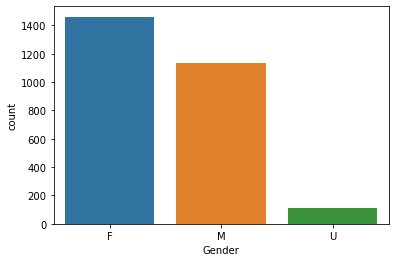

In [25]:
#for Gender 
Gender_train = X_train['Gender']
sns.countplot(Gender_train)

#highest is female and lowest is U

<AxesSubplot:xlabel='Status_Cust', ylabel='count'>

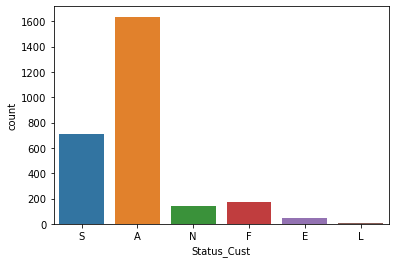

In [26]:
#for Status Customer
status_cust_train = X_train['Status_Cust']
sns.countplot(status_cust_train)

#highest - Active buyer
#lowest - lapsing buyer

<AxesSubplot:xlabel='Status_Latest_Ad', ylabel='count'>

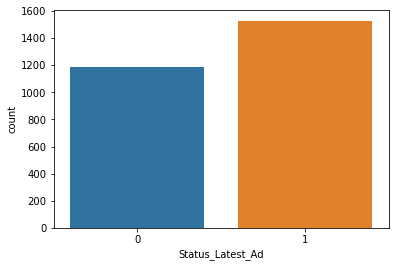

In [27]:
# for Status_Latest_Ad_train
sns.countplot(X_train['Status_Latest_Ad'])

#more view latest ad (1)

<AxesSubplot:xlabel='Cust_Prop', ylabel='count'>

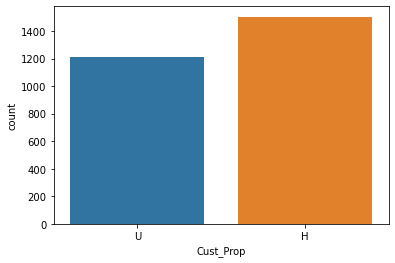

In [28]:
#for Cust_Prop
sns.countplot(X_train['Cust_Prop'])

#more customers own a house

## 5.2. Explore Relationship Between Categorical & Target Variable

<AxesSubplot:xlabel='Cust_Prop', ylabel='count'>

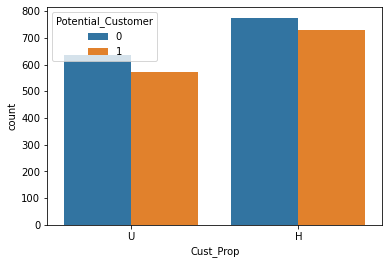

In [29]:
#relationship between Cust_Prop and Potential_Customer
sns.countplot(x = X_train['Cust_Prop'], data = df, hue = "Potential_Customer")

<AxesSubplot:xlabel='Status_Latest_Ad', ylabel='count'>

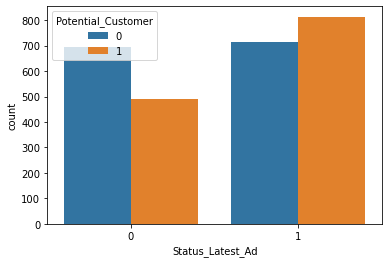

In [30]:
#relationship between Status_Latest_Ad and Potential_Customer
sns.countplot(x = X_train['Status_Latest_Ad'], data = df, hue = "Potential_Customer")

<AxesSubplot:xlabel='Gender', ylabel='count'>

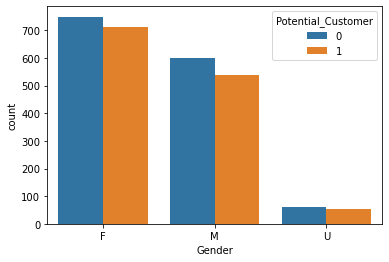

In [31]:
#relationship between Gender and Potential_Customer
sns.countplot(x = X_train['Gender'], data = df, hue = "Potential_Customer")

<AxesSubplot:xlabel='Status_Cust', ylabel='count'>

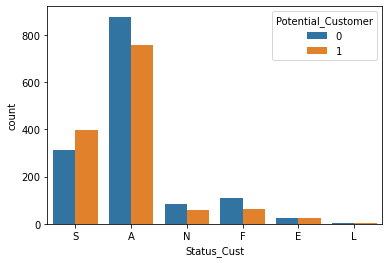

In [32]:
#relationship between Status_Cust and Potential_Customer
sns.countplot(x = X_train['Status_Cust'], data = df, hue = "Potential_Customer")

### 5.2.1 Insight

- owning a house and not owning a house does not differ greatly in terms of probability of being a potential customer.
- same as status latest ad and gender female and male.
- On the other hand, status customer feature show some important insight in which active buyer and star customer has the highest number of potential customer thus they are more likely to be a potential customer for the new products.
- whereas inactive, new, first time and lapsing value is negligible.

### 5.2.2 Solution

- target the active and star customers for the new product by sending advertisement and promotional discount code.

## 5.3. Explore Numerical Variables

array([[<AxesSubplot:title={'center':'Pur_3_years_Avg'}>,
        <AxesSubplot:title={'center':'Ad_Res_1_year'}>,
        <AxesSubplot:title={'center':'Pur_3_years_Indirect'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Ad_Res_Ind_3_Year'}>,
        <AxesSubplot:title={'center':'Ad_Res_Ind_1_Year'}>,
        <AxesSubplot:title={'center':'Pur_latest'}>,
        <AxesSubplot:title={'center':'Ad_Res_5_Year'}>],
       [<AxesSubplot:title={'center':'InAct_First'}>,
        <AxesSubplot:title={'center':'Ad_Res_Ind_5_Year'}>,
        <AxesSubplot:title={'center':'Cust_Last_Purchase'}>,
        <AxesSubplot:title={'center':'Ad_Res_3_Year'}>],
       [<AxesSubplot:title={'center':'Cust_Ann_Income'}>,
        <AxesSubplot:title={'center':'InAct_Last'}>,
        <AxesSubplot:title={'center':'Pur_5_years'}>,
        <AxesSubplot:title={'center':'Pur_3_years'}>],
       [<AxesSubplot:title={'center':'Pur_5_years_Indirect'}>,
        <AxesSubplot:title={'ce

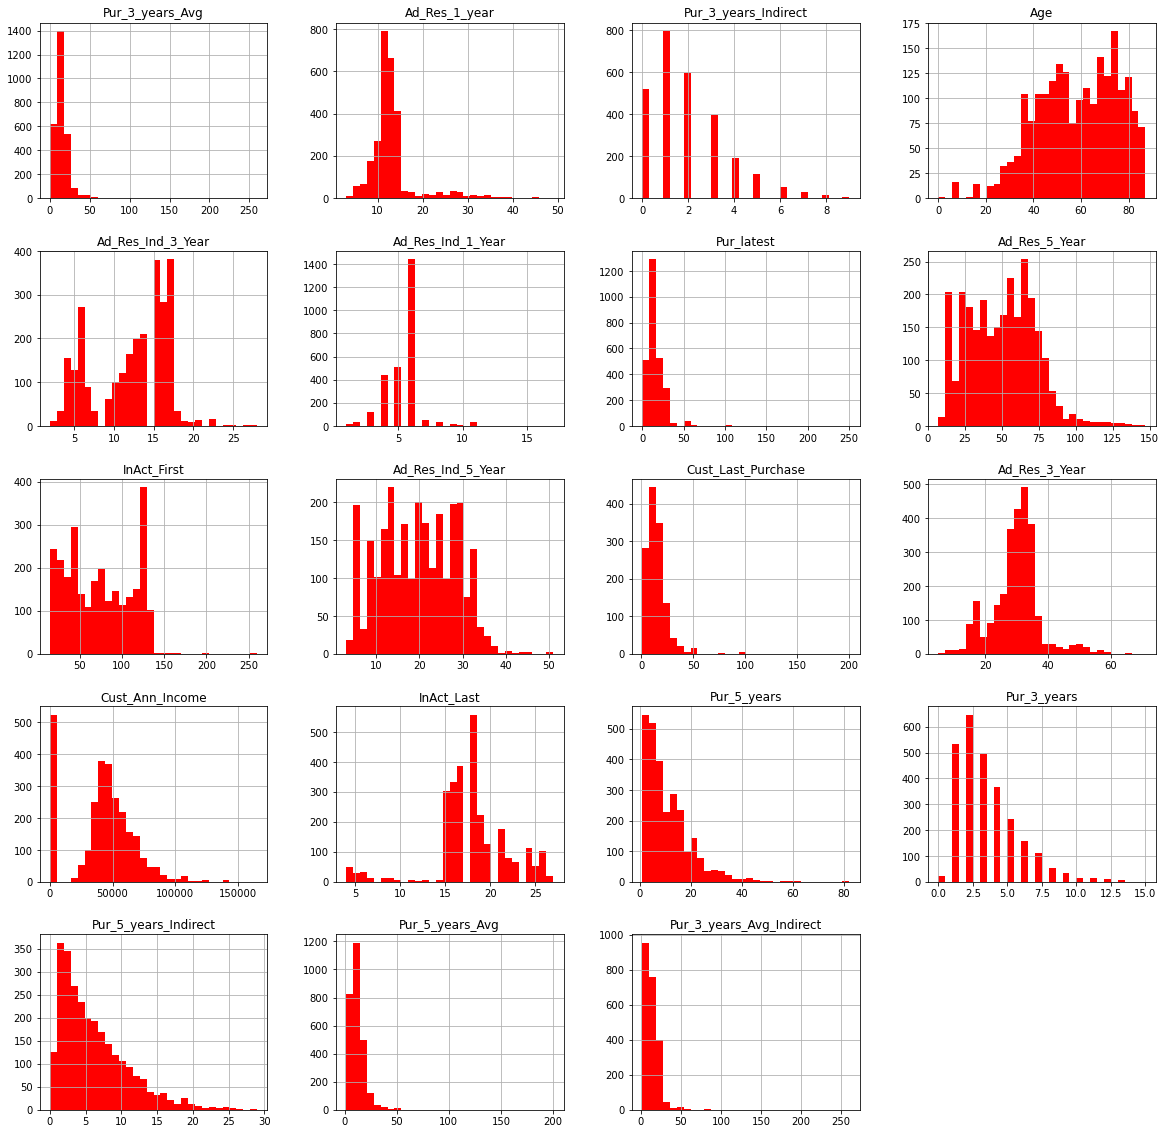

In [33]:
#Create histogram for numerical variables for train set

X_train[NumCols].hist(bins=30, figsize=(20, 20), color='r')

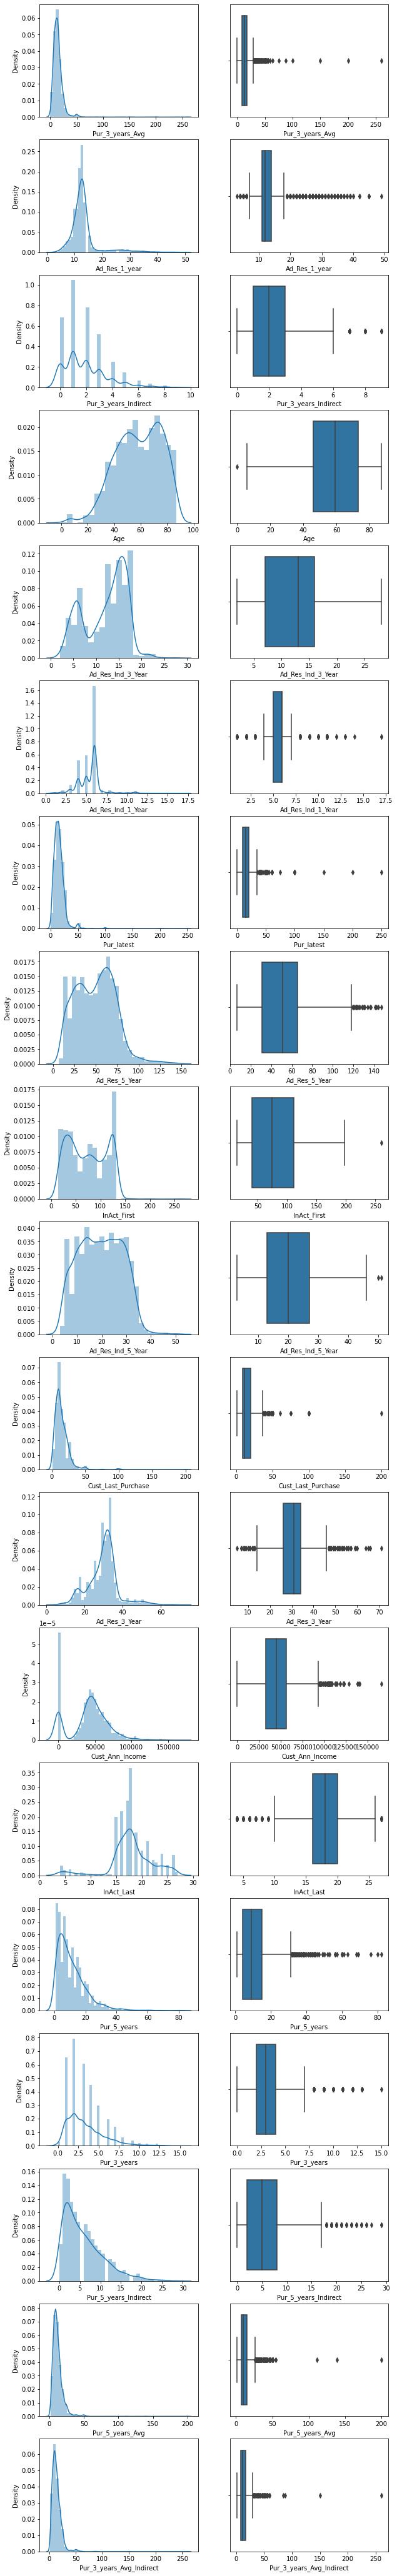

In [34]:
#distribution plot and box plot for numerical variable in train set

fig, ax = plt.subplots(nrows = len(NumCols), ncols = 2, figsize = (10, 75))
for i in range(len(NumCols)):
    sns.distplot(X_train[NumCols[i]], ax = ax[i,0])
    sns.boxplot(X_train[NumCols[i]], ax = ax[i,1])

### 5.3.1 Insight

- most of the numerical features are skewed to the right except Age which is skewed the left.
- There are also outliers as shown in the boxplot which needs to be impute to median (not mean) because the data is skewed.

### 5.3.2 Handling Missing Values

In [35]:
#check the number of missing values in train set
X_train.isnull().sum()

Cust_Last_Purchase          1411
Pur_3_years                    0
Pur_5_years                    0
Pur_3_years_Indirect           0
Pur_5_years_Indirect           0
Pur_latest                     0
Pur_3_years_Avg                0
Pur_5_years_Avg                0
Pur_3_years_Avg_Indirect     520
InAct_Last                     0
InAct_First                    0
Ad_Res_1_year                  0
Ad_Res_3_Year                  0
Ad_Res_5_Year                  0
Ad_Res_Ind_1_Year              0
Ad_Res_Ind_3_Year              0
Ad_Res_Ind_5_Year              0
Status_Cust                    0
Status_Latest_Ad               0
Age                          585
Gender                         0
Cust_Prop                      0
Cust_Ann_Income                0
dtype: int64

#### 5.3.2.1 Cust_Last_Purchase

In [36]:
#Cust_Last_Purchase has 1411 null values and we are going to replace them with median of the column.

X_train.loc[(X_train["Cust_Last_Purchase"].isnull() == True), 'Cust_Last_Purchase'] = X_train['Cust_Last_Purchase'].median()

##### 5.3.2.2 Pur_3_years_Avg_Indirect

In [37]:
#Pur_3_years_Avg_Indirect has 520 null values and we are going to replace them with median of the column.

X_train.loc[(X_train["Pur_3_years_Avg_Indirect"].isnull() == True), 'Pur_3_years_Avg_Indirect'] = X_train['Pur_3_years_Avg_Indirect'].median()

#### 5.3.2.3. Age 

In [38]:
#Age has 585 null values and we are going to replace them with median of the column.

X_train.loc[(X_train["Age"].isnull() == True), 'Age'] = X_train['Age'].median()

#### 5.3.2.4. Cust_Ann_Income 

In [40]:
X_train.tail()

,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,...,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
1403,11.5,7,45,6,27,15.0,14.14,9.80,13.17,16,...,82,5,16,33,S,1,46.0,F,U,88242.0
2424,11.5,2,4,1,2,15.0,12.00,9.00,15.00,17,...,39,6,14,15,A,0,59.0,U,U,0.0
2788,10.0,3,21,0,11,11.0,10.33,5.38,11.88,16,...,75,5,5,30,S,1,79.0,M,H,63092.0
1813,11.5,4,8,2,2,15.0,12.25,12.38,13.50,22,...,43,6,17,18,A,0,79.0,F,H,52311.0
656,11.5,2,21,0,13,15.0,13.50,6.14,11.88,18,...,71,6,6,31,A,1,70.0,F,U,0.0


In [41]:
#Cust_Ann_Income do not have NaN/null values but when we view the last five rows, there are values 0
#values 0 for annual income is probably because the customers chose not to give out their actual annual income and therefore put 0.
#we need to replace the 0 with median

X_train["Cust_Ann_Income"] = X_train["Cust_Ann_Income"].replace(0, (X_train["Cust_Ann_Income"].median()))

In [42]:
#Check the null values in X_train after imputing them with median
X_train.isnull().sum()

Cust_Last_Purchase          0
Pur_3_years                 0
Pur_5_years                 0
Pur_3_years_Indirect        0
Pur_5_years_Indirect        0
Pur_latest                  0
Pur_3_years_Avg             0
Pur_5_years_Avg             0
Pur_3_years_Avg_Indirect    0
InAct_Last                  0
InAct_First                 0
Ad_Res_1_year               0
Ad_Res_3_Year               0
Ad_Res_5_Year               0
Ad_Res_Ind_1_Year           0
Ad_Res_Ind_3_Year           0
Ad_Res_Ind_5_Year           0
Status_Cust                 0
Status_Latest_Ad            0
Age                         0
Gender                      0
Cust_Prop                   0
Cust_Ann_Income             0
dtype: int64

# 6. Feature Enginearing: 


## 6.1. Add Some High Level Features

In [43]:
#removed outliers from numerical variables

for c in X_train[NumCols]:
    #getting upper lower quartile values
    q25,q75=np.percentile(X_train[c],25),np.percentile(X_train[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in X_train[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    print('\n')
    
    #taking mean of a column without considering outliers
    X_train_include = X_train.loc[(X_train[c] >= lower) & (X_train[c] <= upper)]
    mean=int(X_train_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    print('\n')
    #imputing outliers with mean
    X_train[c]=np.where(X_train[c]>upper,mean,X_train[c])
    X_train[c]=np.where(X_train[c]<lower,mean,X_train[c])
    Outliers=[i for i in X_train[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))  
    print('\n')

 Total Number of outliers in Pur_3_years_Avg Before Imputing : 111


 Mean of Pur_3_years_Avg is 13


 Total Number of outliers in Pur_3_years_Avg After Imputing : 0


 Total Number of outliers in Ad_Res_1_year Before Imputing : 275


 Mean of Ad_Res_1_year is 12


 Total Number of outliers in Ad_Res_1_year After Imputing : 0


 Total Number of outliers in Pur_3_years_Indirect Before Imputing : 49


 Mean of Pur_3_years_Indirect is 1


 Total Number of outliers in Pur_3_years_Indirect After Imputing : 0


 Total Number of outliers in Age Before Imputing : 32


 Mean of Age is 59


 Total Number of outliers in Age After Imputing : 0


 Total Number of outliers in Ad_Res_Ind_3_Year Before Imputing : 0


 Mean of Ad_Res_Ind_3_Year is 12


 Total Number of outliers in Ad_Res_Ind_3_Year After Imputing : 0


 Total Number of outliers in Ad_Res_Ind_1_Year Before Imputing : 267


 Mean of Ad_Res_Ind_1_Year is 5


 Total Number of outliers in Ad_Res_Ind_1_Year After Imputing : 0


 Total Number

## 6.2. Explore Relationship Between Numerical variables & Target Variable

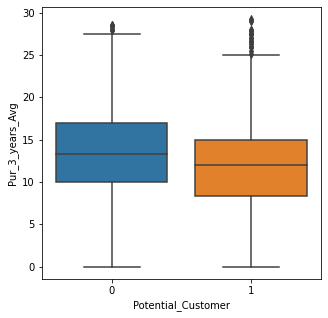

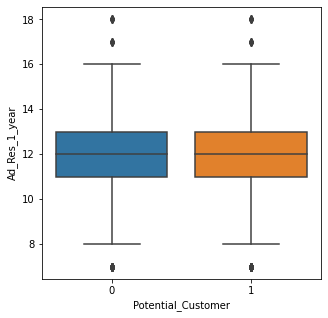

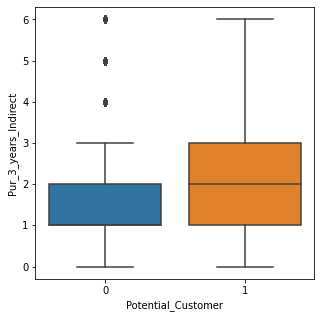

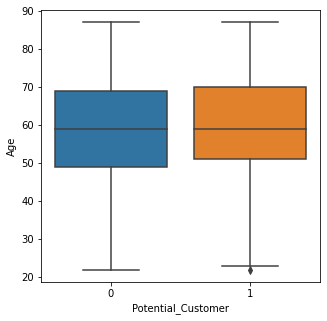

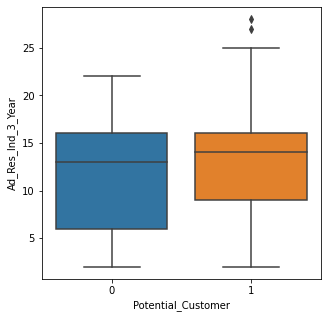

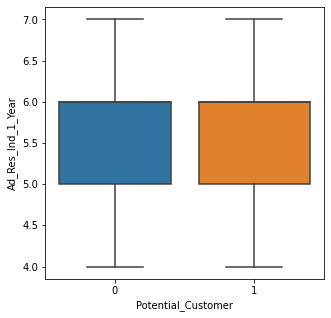

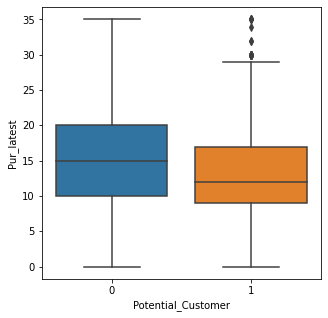

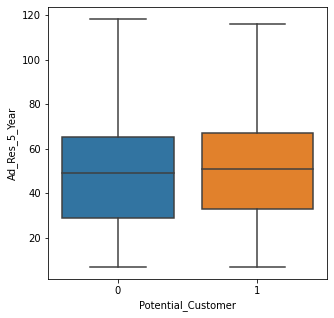

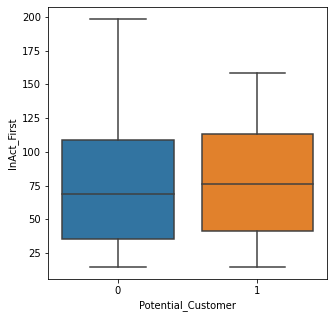

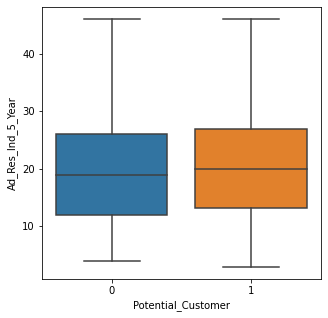

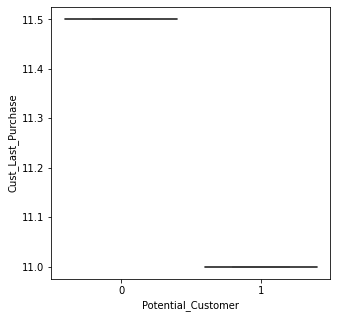

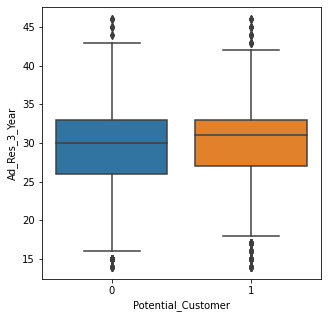

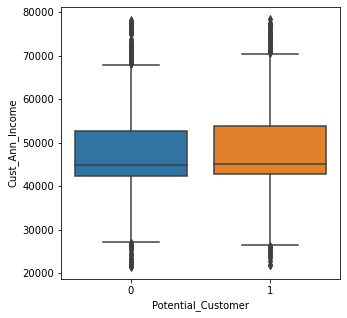

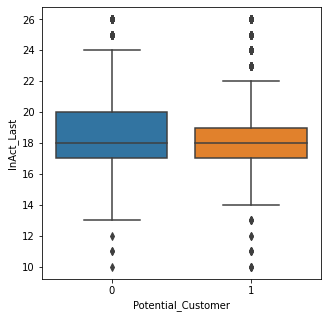

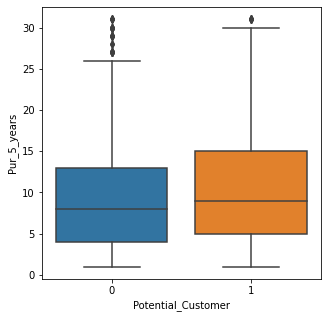

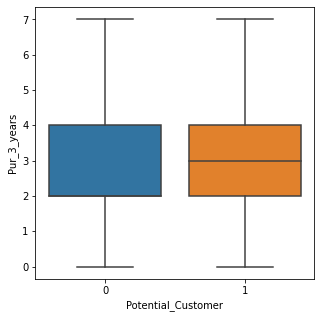

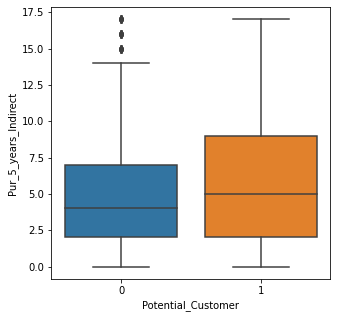

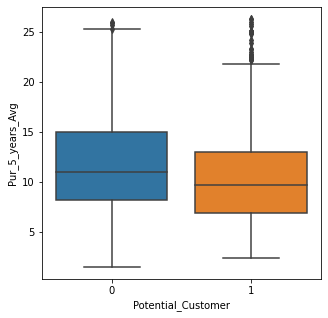

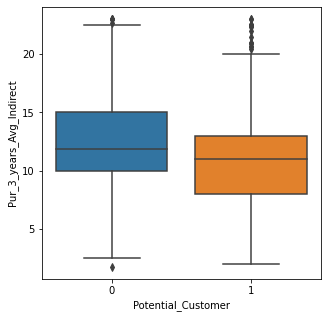

In [50]:
#boxplot of the numerical variables against target variable
for i in X_train[NumCols]:
    plt.figure(figsize=(5,5))
    sns.boxplot(x='Potential_Customer', y=X_train[i], data= df)
    plt.show()

## 6.3. Explore Correlation between Numerical Variables

<AxesSubplot:>

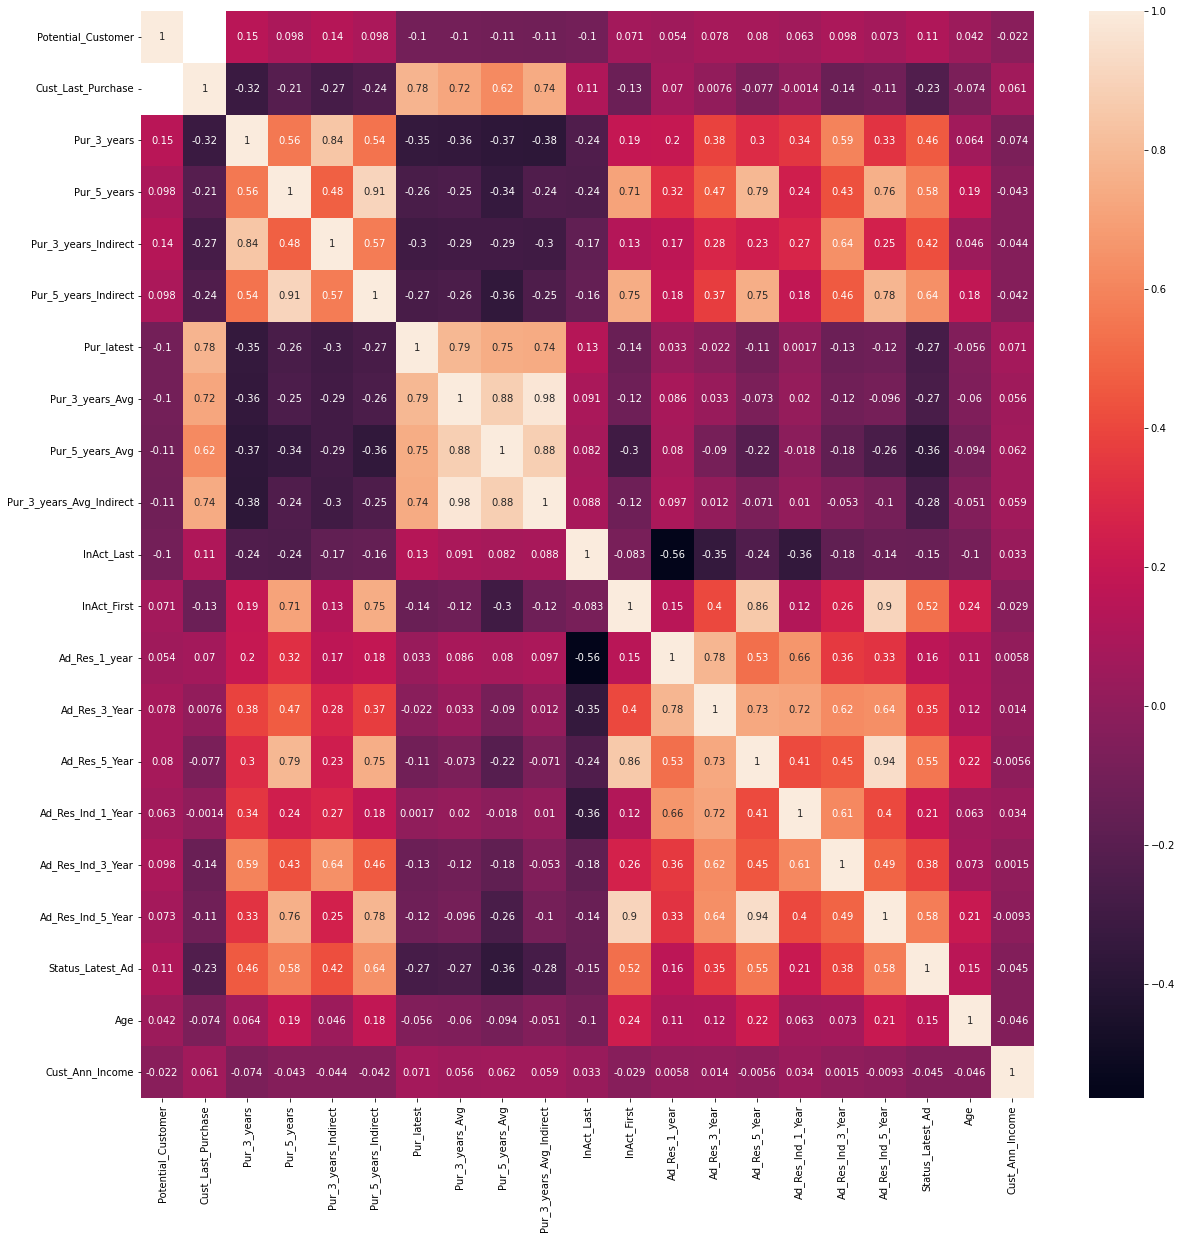

In [51]:
correlation = df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlation, annot=True)

Numerical variables with correlation more than 0.9:

- Ad_Res_Ind_5_Year
- Ad_Res_5_Year
- Pur_3_years_Avg
- Pur_3_years_Avg_Indirect
- Pur_5_years
- Pur_5_years_Indirect

# 7. Feature Selection

In [52]:
#drop columns with high correlation
df.drop(['Ad_Res_Ind_5_Year', 'Ad_Res_5_Year', 'Pur_3_years_Avg', 'Pur_3_years_Avg_Indirect', 'Pur_5_years', 'Pur_5_years_Indirect'], axis=1,inplace=True)

In [53]:
#We can statistically check whether all the independent variables has significant effect on target variables
#if have no significant effect (no different between two category) can drop the columns

In [54]:
col=list(df.select_dtypes(include=['int64','float64']).columns)

In [55]:
#using two-sample unpaired t-test for the numerical data

from scipy import stats

for i in col:
    x = np.array(df[df.Potential_Customer == 0][i]) 
    y = np.array(df[df.Potential_Customer == 1][i])
    t, p_value  = stats.ttest_ind(x,y, axis = 0,equal_var=False) 
    print('{} P_Value:{}'.format('\033[1m',p_value))
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis.{} of potential and non-potential customer are not same'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.{} of potential and non-potential customer are  same'.format('\033[1m',i))
    print('\n')


 P_Value:0.0
 Rejecting Null Hypothesis.Potential_Customer of potential and non-potential customer are not same


 P_Value:nan
 Fail to Reject Null Hypothesis.Cust_Last_Purchase of potential and non-potential customer are  same


 P_Value:8.98261146035013e-19
 Rejecting Null Hypothesis.Pur_3_years of potential and non-potential customer are not same


 P_Value:4.86019811081118e-16
 Rejecting Null Hypothesis.Pur_3_years_Indirect of potential and non-potential customer are not same


 P_Value:1.4446435200349065e-09
 Rejecting Null Hypothesis.Pur_latest of potential and non-potential customer are not same


 P_Value:1.5378245010901036e-11
 Rejecting Null Hypothesis.Pur_5_years_Avg of potential and non-potential customer are not same


 P_Value:6.103912230637909e-10
 Rejecting Null Hypothesis.InAct_Last of potential and non-potential customer are not same


 P_Value:2.001390872982544e-05
 Rejecting Null Hypothesis.InAct_First of potential and non-potential customer are not same


 P_Value:

In [56]:
#drop the column in which potential and non-potential customer are same
df.drop(['Cust_Last_Purchase', 'Age', 'Cust_Ann_Income'],axis=1,inplace=True)

In [57]:
cat_col=list(df.select_dtypes(include=['object']).columns)

In [58]:
#using chi-squared test for the categorical data

for i in cat_col:
    crosstab=pd.crosstab(df['Potential_Customer'],df[i])
    chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis. \n There is significant difference in {} Feature for different category of target variable'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.\n There is no significant difference in {} Feature for different category of target variable'.format('\033[1m',i))
    print('\n')


 Rejecting Null Hypothesis. 
 There is significant difference in Status_Cust Feature for different category of target variable


 Fail to Reject Null Hypothesis.
 There is no significant difference in Gender Feature for different category of target variable


 Fail to Reject Null Hypothesis.
 There is no significant difference in Cust_Prop Feature for different category of target variable




In [59]:
#drop the independent columns where there is no significant difference to the target variable
df.drop(['Gender', 'Cust_Prop'],axis=1,inplace=True)

In [60]:
#check the remaining columns
df.columns

Index(['Potential_Customer', 'Pur_3_years', 'Pur_3_years_Indirect',
       'Pur_latest', 'Pur_5_years_Avg', 'InAct_Last', 'InAct_First',
       'Ad_Res_1_year', 'Ad_Res_3_Year', 'Ad_Res_Ind_1_Year',
       'Ad_Res_Ind_3_Year', 'Status_Cust', 'Status_Latest_Ad'],
      dtype='object')

# 8. Data PreProcessing

## 8.1 Dummy Variables

In [62]:
#creating dataframe of categorical and numerical variables

CatCols2 = ['Potential_Customer','Status_Cust','Status_Latest_Ad']
object_columns_df = df[CatCols2]
NumCols2 = ['Pur_latest','Pur_3_years_Indirect','InAct_First',
 'Ad_Res_3_Year','Ad_Res_1_year','InAct_Last','Pur_5_years_Avg','Pur_3_years','Ad_Res_Ind_3_Year']
numerical_columns_df =df[NumCols2]

In [63]:
#convert categorical variables to dummy variables (0 and 1)
object_columns_df = pd.get_dummies(object_columns_df, columns=CatCols2, drop_first = True)

In [64]:
#concat the dummy variable with numerical variable
df_final = pd.concat([object_columns_df, numerical_columns_df], axis=1,sort=False)
df_final.head()

,Potential_Customer_1,Status_Cust_E,Status_Cust_F,Status_Cust_L,Status_Cust_N,Status_Cust_S,Status_Latest_Ad_1,Pur_latest,Pur_3_years_Indirect,InAct_First,Ad_Res_3_Year,Ad_Res_1_year,InAct_Last,Pur_5_years_Avg,Pur_3_years,Ad_Res_Ind_3_Year
0,1,0,0,0,0,0,0,0.0,2,110,48,32,14,7.76,2,12
1,1,0,0,0,0,0,1,25.0,0,75,35,13,18,13.00,1,6
2,0,0,0,0,0,1,1,15.0,3,57,35,14,19,11.25,5,17
3,1,0,0,0,0,0,0,20.0,0,113,38,17,5,12.45,1,8
4,1,0,0,0,0,1,1,3.0,2,118,28,13,17,3.80,3,12


## 8.2 Data Scaling

In [65]:
#variable x and y after creating dummy variable and split train and test set

X = df_final[df_final.columns.drop(['Potential_Customer_1'])]
y = df_final['Potential_Customer_1']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42, stratify=y)

In [66]:
#Use minmaxscaler to scale the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# 9. Model Creation

In [67]:
#Check shape of X_train_scaled
X_train_scaled.shape

(2713, 15)

In [68]:
#Check shape of X_test_scaled
X_test_scaled.shape

(905, 15)

In [69]:
#import libraries for creating model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#import libraries for evaluating model performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.metrics import adjusted_rand_score, v_measure_score, homogeneity_score, completeness_score, silhouette_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [70]:
#create the model
model_lr = LogisticRegression()
model_svc = SVC(kernel='linear')
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()

In [71]:
#fit the train set to our model
model_lr.fit(X_train, y_train)
model_svc.fit(X_train, y_train)
model_dt.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

#find y-pred
y_pred_lr = model_lr.predict(X_test)
y_pred_svc = model_rf.predict(X_test)
y_pred_dt = model_svc.predict(X_test)
y_pred_rf = model_dt.predict(X_test)

In [72]:
#accuracy score of each model 
accuracy_lr = metrics.accuracy_score(y_test, y_pred_lr)
accuracy_svc = metrics.accuracy_score(y_test, y_pred_svc)
accuracy_dt = metrics.accuracy_score(y_test, y_pred_dt)
accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)

print('accuracy of lr: ', accuracy_lr)
print('accuracy of svc: ', accuracy_svc)
print('accuracy of dt: ', accuracy_dt)
print('accuracy of rf: ', accuracy_rf)

accuracy of lr:  0.5580110497237569
accuracy of svc:  0.56353591160221
accuracy of dt:  0.5392265193370166
accuracy of rf:  0.5248618784530387


The accuracy score of all five models is quite low and similar (~0.5)

Now, we will do Hyper-parameters tuning using gridsearch to find the best parameters for each model and see if we can improve the accuracy score

In [73]:
#Random Forest model

# setting a grid 
parameters = {"max_depth":np.arange(1,30)}

# instantiating the GridSearchCV object
grid = GridSearchCV(model_rf, parameters)

# fitting the object
grid.fit(X_train_scaled, y_train)
# the scores
print("The best params are :", grid.best_params_)
print("The best score is   :", grid.best_score_)

# predicting the values
model_rf = grid.best_estimator_
model_rf.fit(X_train_scaled,y_train)
y_pred_rf = model_rf.predict(X_test_scaled)

# printing the test accuracy
print("The test accuracy score of rf after hyper-parameter tuning is ", accuracy_score(y_test, y_pred_rf))

The best params are : {'max_depth': 3}
The best score is   : 0.5768513044246465
The test accuracy score of rf after hyper-parameter tuning is  0.5657458563535912


In [74]:
#SVC

parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}
grid = GridSearchCV(model_svc, parameters) 
grid.fit(X_train_scaled, y_train)

# the scores
print("The best params are :", grid.best_params_)
print("The best score is   :", grid.best_score_)

# predicting the values
model_svc = grid.best_estimator_
model_svc.fit(X_train_scaled,y_train)
y_pred_svc = model_svc.predict(X_test_scaled)

# printing the test accuracy
print("The test accuracy score of SVC after hyper-parameter tuning is ", accuracy_score(y_test, y_pred_svc))

The best params are : {'C': 6, 'gamma': 1e-05}
The best score is   : 0.5547538956052545
The test accuracy score of SVC after hyper-parameter tuning is  0.5392265193370166


In [75]:
#decision tree

parameters = {"max_depth":np.arange(1,30)}
grid = GridSearchCV(model_dt, parameters)
grid.fit(X_train_scaled, y_train)

# the scores
print("The best params are :", grid.best_params_)
print("The best score is   :", grid.best_score_)

# predicting the values
model_dt = grid.best_estimator_
model_dt.fit(X_train_scaled,y_train)
y_pred_dt = model_dt.predict(X_test_scaled)

# printing the test accuracy
print("The test accuracy score of dt after hyper-parameter tuning is ", accuracy_score(y_test, y_pred_dt))

The best params are : {'max_depth': 3}
The best score is   : 0.5668909230528769
The test accuracy score of dt after hyper-parameter tuning is  0.549171270718232


In [77]:
#logistic regression

parameters = {'fit_intercept': [True,False],'C': [0.001, 0.004, 0.01, 0.1, 0.4, 1, 10, 50, 100],'penalty' : ['l1', 'l2']}
grid = GridSearchCV(model_lr, parameters)
grid.fit(X_train_scaled, y_train)

# the scores
print("The best params are :", grid.best_params_)
print("The best score is   :", grid.best_score_)

# predicting the values
model_lr = grid.best_estimator_
model_lr.fit(X_train_scaled,y_train)
y_pred_lr = model_lr.predict(X_test_scaled)

# printing the test accuracy
print("The test accuracy score of dt after hyper-parameter tuning is ", accuracy_score(y_test, y_pred_lr))

The best params are : {'C': 1, 'fit_intercept': True, 'penalty': 'l2'}
The best score is   : 0.5709676323282571
The test accuracy score of dt after hyper-parameter tuning is  0.5646408839779006


# 10. Model Evaluation & Comparison

In [78]:
#Classification report of each model

print('classification_report of lr:\n',classification_report(y_test, y_pred_lr))
print('classification_report of svc:\n',classification_report(y_test, y_pred_svc))
print('classification_report of dt:\n',classification_report(y_test, y_pred_dt))
print('classification_report of rf:\n',classification_report(y_test, y_pred_rf))

classification_report of lr:
               precision    recall  f1-score   support

           0       0.56      0.74      0.64       471
           1       0.57      0.37      0.45       434

    accuracy                           0.56       905
   macro avg       0.57      0.56      0.55       905
weighted avg       0.57      0.56      0.55       905

classification_report of svc:
               precision    recall  f1-score   support

           0       0.57      0.46      0.51       471
           1       0.52      0.63      0.57       434

    accuracy                           0.54       905
   macro avg       0.54      0.54      0.54       905
weighted avg       0.55      0.54      0.54       905

classification_report of dt:
               precision    recall  f1-score   support

           0       0.54      0.90      0.68       471
           1       0.61      0.17      0.26       434

    accuracy                           0.55       905
   macro avg       0.57      0.53    